# Plotting an example DESI tile and Rosette 1 from the Early Data Release
Stéphanie Juneau (NOIRLab) with contributions from Ragadeepika Pucha (U. Arizona), Benjamin Weaver (NOIRLab) and the DESI Data Team

## Overview

The DESI instrument features a circular field-of-view spanning 3 degrees across and comprising 5000 fiber positioning robots. A single DESI pointing with a given fiber configuration is called a tile, and is further divided into 10 petals comprising 500 fibers each. During the survey validation (SV) observing campaign, some designated locations were observed multiple times with strongly overlapping tiles in order to obtain a high spatial density coverage of targets with spectroscopic observations. These so-called rosettes are described in the Survey Validation paper ([DESI Collaboration et al. 2023a](https://ui.adsabs.harvard.edu/abs/2023arXiv230606307D/abstract)) and in the DESI EDR Overview paper ([DESI Collaboration et al. 2023b](https://ui.adsabs.harvard.edu/abs/2023arXiv230606308D/abstract)).

In this notebook, we select an example tile (`TILEID=30`) and illustrate the fiber positions and how they are divided into petals. We further illustrate an example rosette (Rosette 1; Figure 5 from [DESI Collaboration et al. 2023b](https://ui.adsabs.harvard.edu/abs/2023arXiv230606308D/abstract)) and how the fibers positions as divided into HEALPixels, which are used to arrange the data in small regions with equal sky areas.


### Bug reporting and requests
If you identify any errors or have requests for additional functionality in this notebook create a new issue at https://github.com/desihub/tutorials/issues. 

### Questions
If you have questions about this tutorial, or about DESI in general, please submit a question on the [DESI User Forum](https://help.desi.lbl.gov) 

## Imports and set up

In [1]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

In [2]:
## Making the matplotlib plots look nicer
settings = {
    'font.size':14,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

## Obtain DESI EDR data per healpix and per tile

In this notebook, we will focus our attention on Rosette 1 which is located around RA=179.6 and Dec=0.0 degrees and observed during SV3 (`SURVEY='sv3'`). While Rosette 1 was observed during both dark time and bright time, we will further focus on `PROGRAM='dark'`.

In [3]:
# Release directory path

specprod = 'fuji'    # Internal name for the EDR
specprod_dir = '/global/cfs/cdirs/desi/public/edr/spectro/redux/fuji/'
print(specprod_dir)

/global/cfs/cdirs/desi/public/edr/spectro/redux/fuji/


In [4]:
# Tile file from SURVEY='sv3' and PROGRAM='dark'
tile_file = f'{specprod_dir}zcatalog/ztile-sv3-dark-cumulative.fits'

t_tile = Table.read(tile_file, hdu=1)
ra_tile = t_tile['TARGET_RA']
dec_tile = t_tile['TARGET_DEC']

# We will use Tile #30 for the example below
selec_tile = t_tile['TILEID']==30

In [5]:
print(f'N rows in sv3-dark tile file = {len(t_tile)}')
print(f'N rows on tile #30 = {len(t_tile[selec_tile])}')

N rows in sv3-dark tile file = 1194000
N rows on tile #30 = 5000


In [6]:
# Healpix file from SURVEY='sv3' and PROGRAM='dark'
zpix_file = f'{specprod_dir}zcatalog/zpix-sv3-dark.fits'

t_zpix_sv3 = Table.read(zpix_file, hdu=1)

## Rosette 1

As described in Table 4 from the DESI EDR Overview paper, Rosette 1 is composed of `TILEID = 28-53, 445`. We further restrict to `PROGRAM='dark'` from our choice to read the sv3-dark ztile file. First, we demonstrate that the tile subset is `TILEID = 28-38, 445`, and then we find the overlapping targets in the healpix-based zpix file to obtain the HEALPIX information.

In [7]:
## Rosette 1 tiles (PROGRAM='dark')
is_ros1_tile = ((t_tile['TILEID']>=28)&(t_tile['TILEID']<=53))|(t_tile['TILEID']==445)
ros1_tile = t_tile['TARGETID','TILEID'][is_ros1_tile]

In [8]:
## Print the list of TILEIDs from sv3-dark
print(np.unique(ros1_tile['TILEID']))

TILEID
------
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
   445


In [9]:
## Keep only zpix entries that are in Rosette 1, 'sv3', 'dark'
t_zpix = join(ros1_tile, t_zpix_sv3, join_type='inner', keys='TARGETID', metadata_conflicts='silent')

print(f'Resulting number of rows after joining with Rosette 1 dark tiles = {len(t_zpix)}')

Resulting number of rows after joining with Rosette 1 dark tiles = 59864


In [10]:
## RA, Dec for the matched zpix table
ra_pix = t_zpix['TARGET_RA']
dec_pix = t_zpix['TARGET_DEC']

# List if unique HEALPIX values in the Rosette 1 area
hpixs = np.unique(t_zpix['HEALPIX'])

print(f"N(healpix) = {len(np.unique(t_zpix['HEALPIX']))}")
print(" ")
print(hpixs)

N(healpix) = 19
 
HEALPIX
-------
  25595
  25596
  25597
  25598
  25599
  26280
  26282
  26283
  26961
  26964
  26965
  26966
  26967
  26973
  27648
  27649
  27650
  27651
  27656


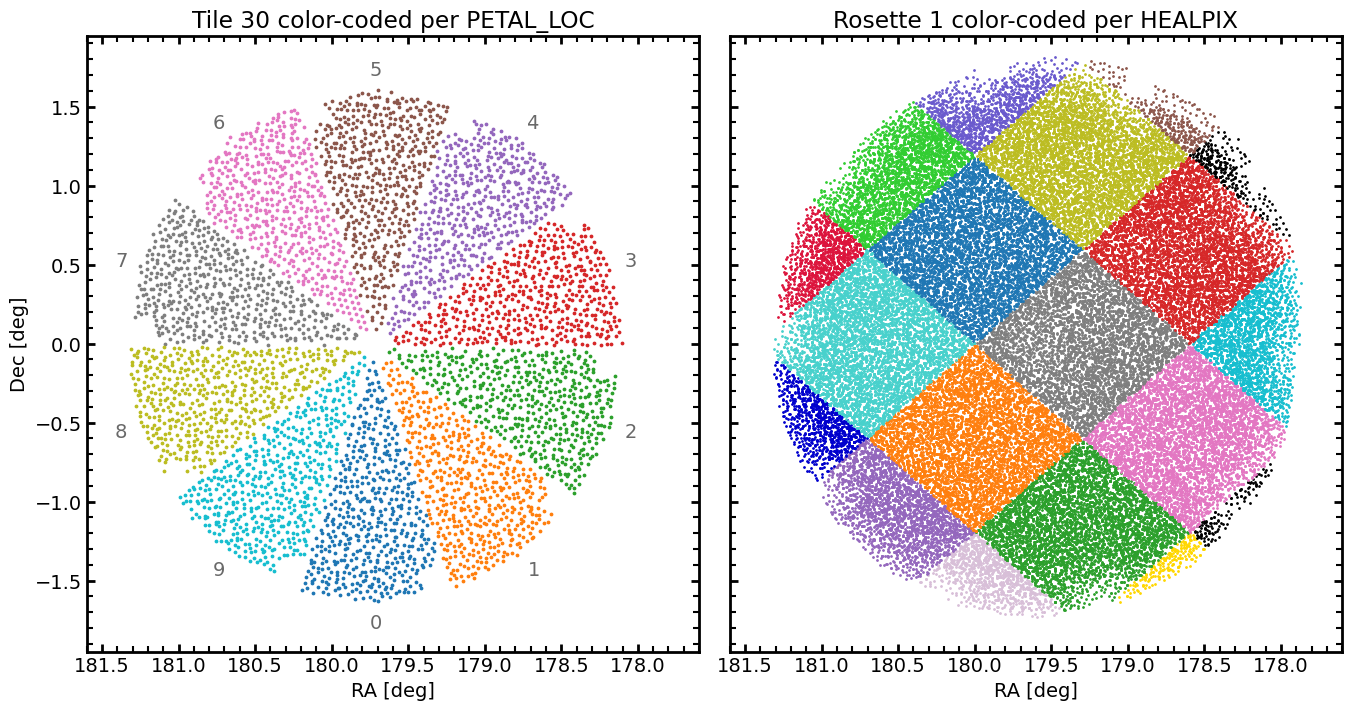

In [11]:
## Define a circle to label the petals around the field-of-view

# central poition (xc, yc) with a radius r
xc = 179.7+0.05  #offset to accommodate font size
yc = 0.-0.05     #offset to accommodate font size
r = 1.75         #deg
theta = np.arange(270,-90,-36)*np.pi/180.

# define arrays of 10 positions around the circle
xcirc = xc + r*np.cos(theta)
ycirc = yc + r*np.sin(theta)

## Pick a list of colors for the HEALPixels
colors = ['gold','thistle','tab:purple','tab:green','tab:orange','mediumblue','mediumturquoise','crimson','k','tab:pink','tab:grey',\
          'tab:cyan','tab:red','k','tab:blue','limegreen','tab:olive','slateblue','tab:brown']

## Two panel figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16.2,8), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05)

# Loop over petal_loc from 0 to 9 (10 petals)
for petal in range(10):
    rpetal = selec_tile&(t_tile['PETAL_LOC']==petal)
    ax1.text(xcirc[petal],ycirc[petal],f'{petal}',color='dimgrey')
    ax1.scatter(ra_tile[rpetal],dec_tile[rpetal],s=3,label=f'Petal={petal}')

# Loop over the healpixels covering Rosette 1
for i,hpix in enumerate(hpixs):
    rhpx = (t_zpix['HEALPIX']==hpix)
    ax2.scatter(ra_pix[rhpx],dec_pix[rhpx],s=1,color=colors[i])

# Titles for each panel
ax1.set_title('Tile 30 color-coded per PETAL_LOC')
ax2.set_title('Rosette 1 color-coded per HEALPIX')

# Common plotting ranges for both panels
plt.xlim(181.6,177.6)
plt.ylim(-1.95,1.95)

# Axis labels
ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')
ax2.set_xlabel('RA [deg]')
plt.show()

## Examime which fibers are on target (`TGT`), sky (`SKY`) or other/problematic (`--`)

Below, we define conditions on whether the fiber was placed on tsrget, on a sky position or had an issue for the same tile as above (`TILEID=30`).

In [12]:
## Define conditions to check if the fiber was placed on a target (TGT) or on a sky position (SKY) or possibly stuck/faulty (--)
is_tgt = t_tile['OBJTYPE']=='TGT'
is_sky = t_tile['OBJTYPE']=='SKY'
is_prob = (~is_tgt)&(~is_sky)

Text(0.5, 0, 'RA [deg]')

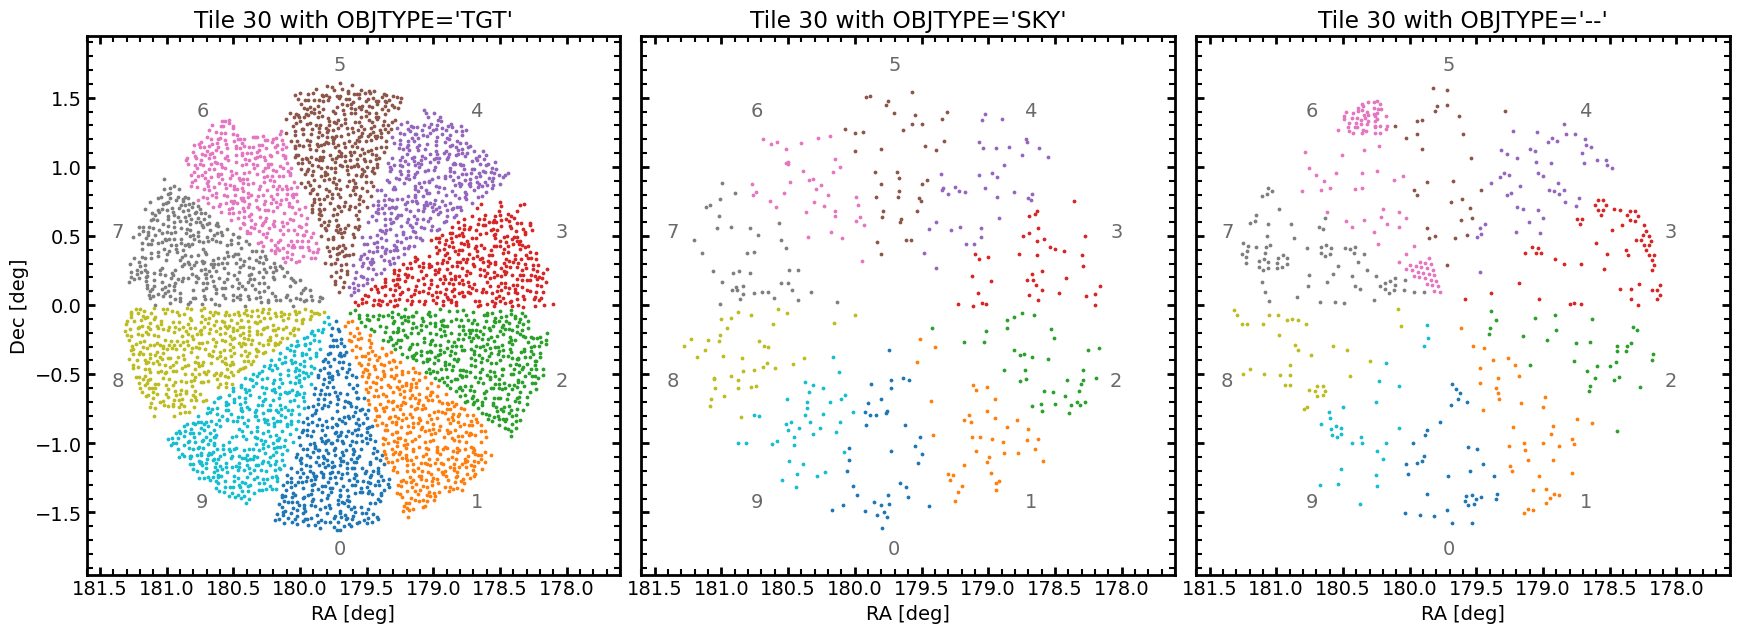

In [13]:
# Three panel figure
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(21.2,7), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.04)

# Loop over petal_loc from 0 to 9 (10 petals)
for petal in range(10):
    rpetal = selec_tile&(t_tile['PETAL_LOC']==petal)
    
    # TGT
    ax1.text(xcirc[petal],ycirc[petal],f'{petal}',color='dimgrey')
    ax1.scatter(ra_tile[rpetal&is_tgt],dec_tile[rpetal&is_tgt],s=3,label=f'Petal={petal}')

    # SKY
    ax2.text(xcirc[petal],ycirc[petal],f'{petal}',color='dimgrey')
    ax2.scatter(ra_tile[rpetal&is_sky],dec_tile[rpetal&is_sky],s=3,label=f'Petal={petal}')

    # Other / problematic
    ax3.text(xcirc[petal],ycirc[petal],f'{petal}',color='dimgrey')
    ax3.scatter(ra_tile[rpetal&is_prob],dec_tile[rpetal&is_prob],s=3,label=f'Petal={petal}')


# Titles for each panel
ax1.set_title("Tile 30 with OBJTYPE='TGT'")
ax2.set_title("Tile 30 with OBJTYPE='SKY'")
ax3.set_title("Tile 30 with OBJTYPE='--'")

# Common plotting ranges for all panels
plt.xlim(181.6,177.6)
plt.ylim(-1.95,1.95)

# Axis labels
ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')
ax2.set_xlabel('RA [deg]')
ax3.set_xlabel('RA [deg]')